<a href="https://colab.research.google.com/github/RG-schoolacc/School/blob/main/Gartley_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Worldcup=pd.read_csv('/content/drive/MyDrive/myDATA/WorldCupMatches.csv')
Worldcup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

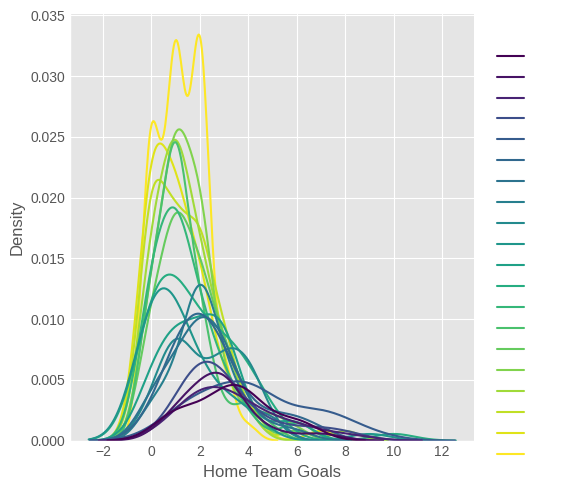

In [65]:
sns.displot(data=Worldcup,x='Home Team Goals',hue='Year',kind='kde',palette='viridis')
#this is really cluttered
# sns.displot(data=Worldcup,x='Home Team Goals',col='Year',col_wrap=4,kind='kde',fill=True) #breaks them into seperate years

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

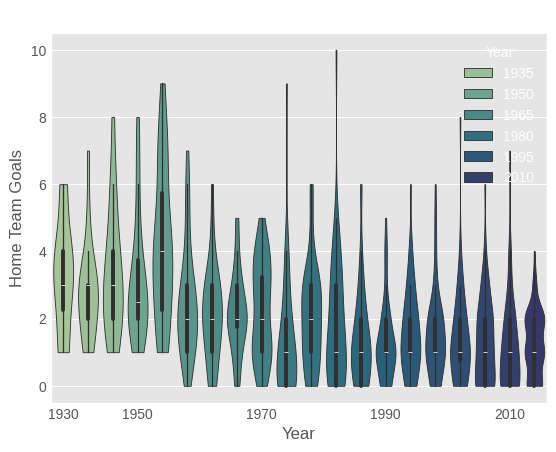

In [66]:
Worldcup['Year'] = Worldcup['Year'].astype(int)
ax = sns.violinplot(data=Worldcup, x='Year', y='Home Team Goals',hue="Year",palette="crest",cut=0)#had -2 for goals -impossible
years = sorted(Worldcup['Year'].unique())
labels = [str(year) if year % 10 == 0 else "" for year in years]
ax.set_xticks(range(len(years)))
ax.set_xticklabels(labels)
plt.title('Distribution of Home Team Goals per Year')
plt.show()

In [67]:
!pip install joypy

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



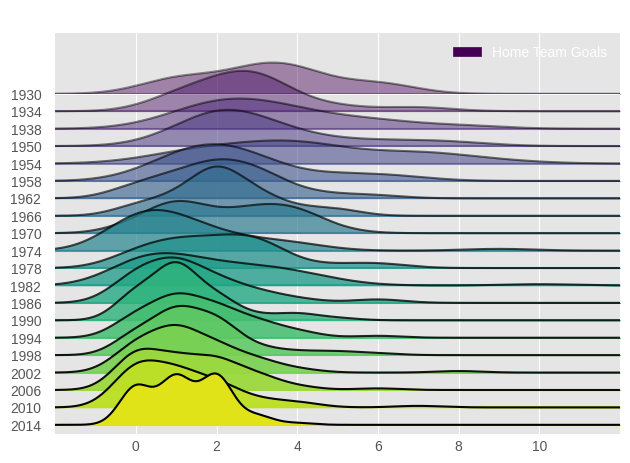

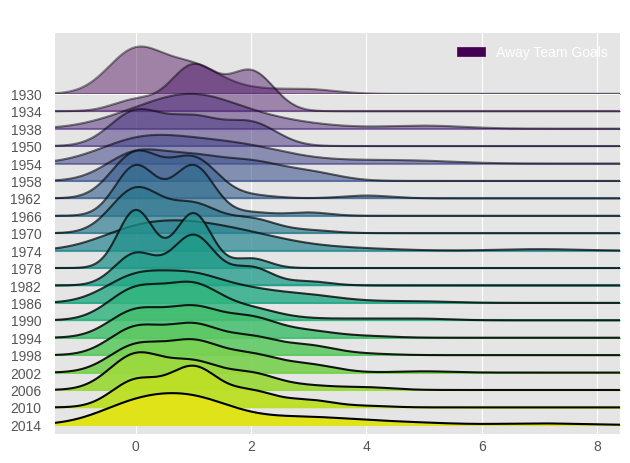

In [68]:
import joypy as joypy
fig, axes = joypy.joyplot(data=Worldcup, by='Year',column='Home Team Goals',colormap=plt.cm.viridis,legend=True,fade=True,grid=True, title="Home Team Goals Distribution Over the Years")
fig, axes = joypy.joyplot(data=Worldcup, by='Year',column='Away Team Goals',colormap=plt.cm.viridis,legend=True,fade=True,grid=True, title="Away Team Goals Distribution Over the Years")

Second run With seaborn

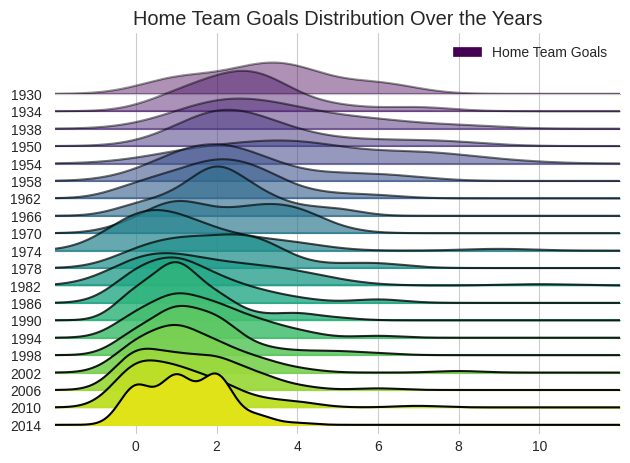

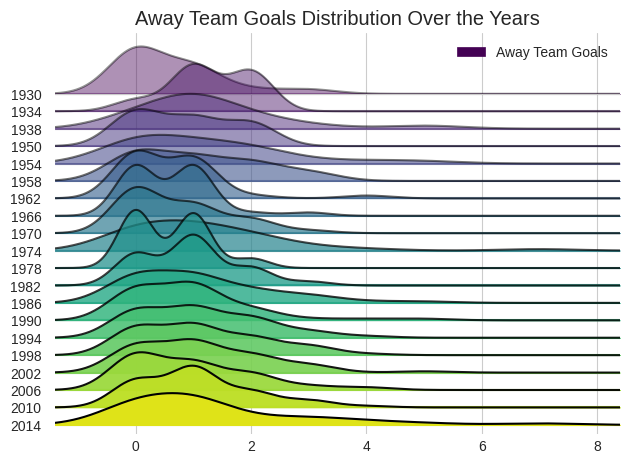

In [69]:
import joypy as joypy
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')#This works -Just makes it less gray and cleans up the chart
fig, axes = joypy.joyplot(data=Worldcup, by='Year',column='Home Team Goals',colormap=plt.cm.viridis,legend=True,fade=True,grid=True, title="Home Team Goals Distribution Over the Years")
fig, axes = joypy.joyplot(data=Worldcup, by='Year',column='Away Team Goals',colormap=plt.cm.viridis,legend=True,fade=True,grid=True, title="Away Team Goals Distribution Over the Years")

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



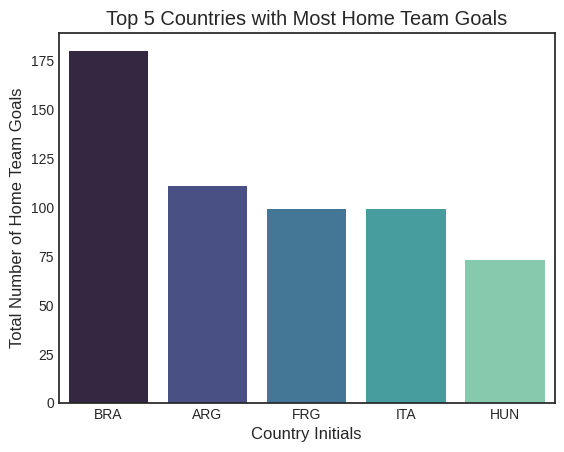

In [70]:
Initals=Worldcup.groupby('Home Team Initials')["Home Team Goals"].sum().reset_index()
top_5 = Initals.sort_values(by='Home Team Goals', ascending=False).head(5)
sns.barplot(data=top_5,x='Home Team Initials',y='Home Team Goals', hue='Home Team Initials',palette='mako')
#titles and labels
plt.title('Top 5 Countries with Most Home Team Goals')
plt.xlabel('Country Initials')
plt.ylabel('Total Number of Home Team Goals')
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



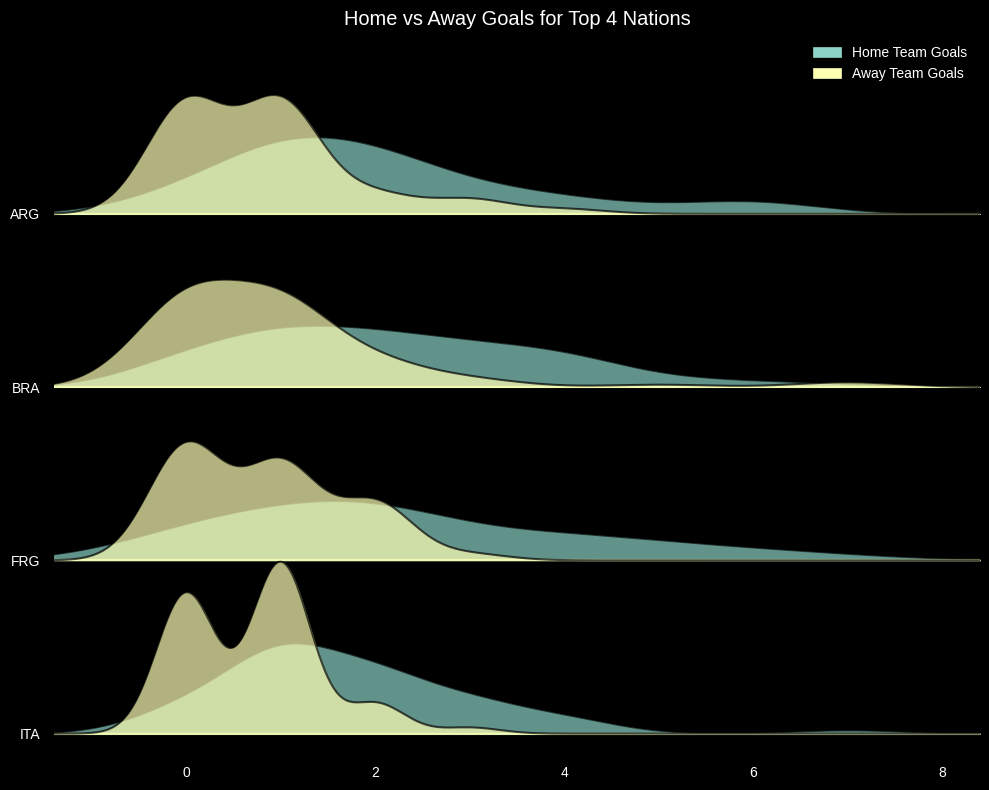

In [71]:
top4 = top_5.head(4)
top_4_initials = top4['Home Team Initials'].tolist()

# dataframe for the top 4 countries
Top4f = Worldcup[Worldcup['Home Team Initials'].isin(top_4_initials)]
plt.style.use('dark_background')
fig, axes = joypy.joyplot(data=Top4f,by='Home Team Initials',column=['Home Team Goals', 'Away Team Goals'],legend=True,overlap=0.5,alpha=0.7,figsize=(10, 8),title='Home vs Away Goals for Top 4 Nations')
plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [72]:
!pip install seaborn_qqplot

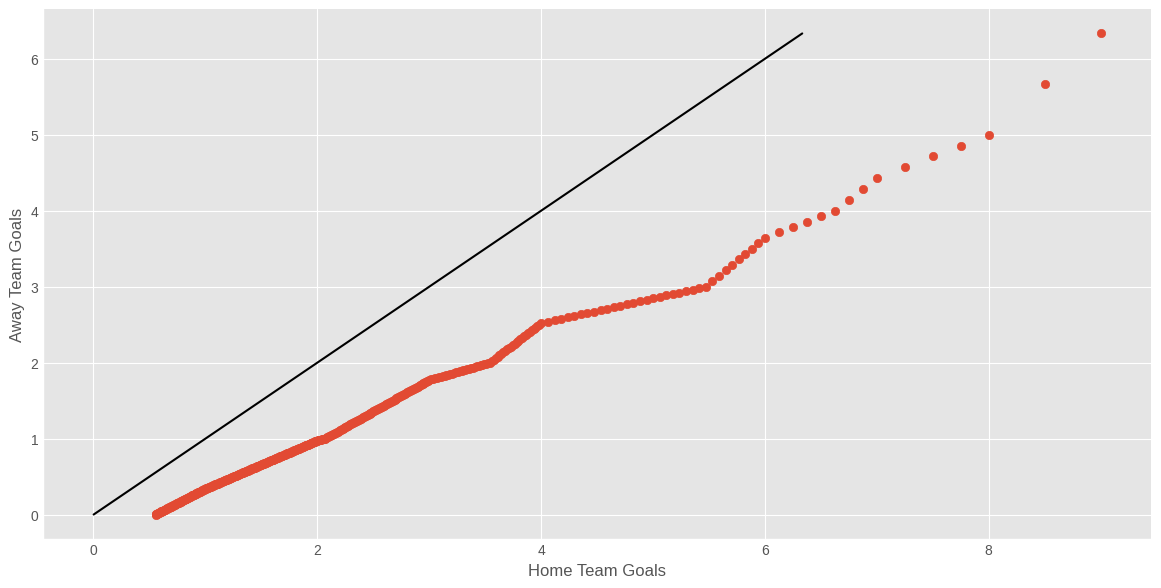

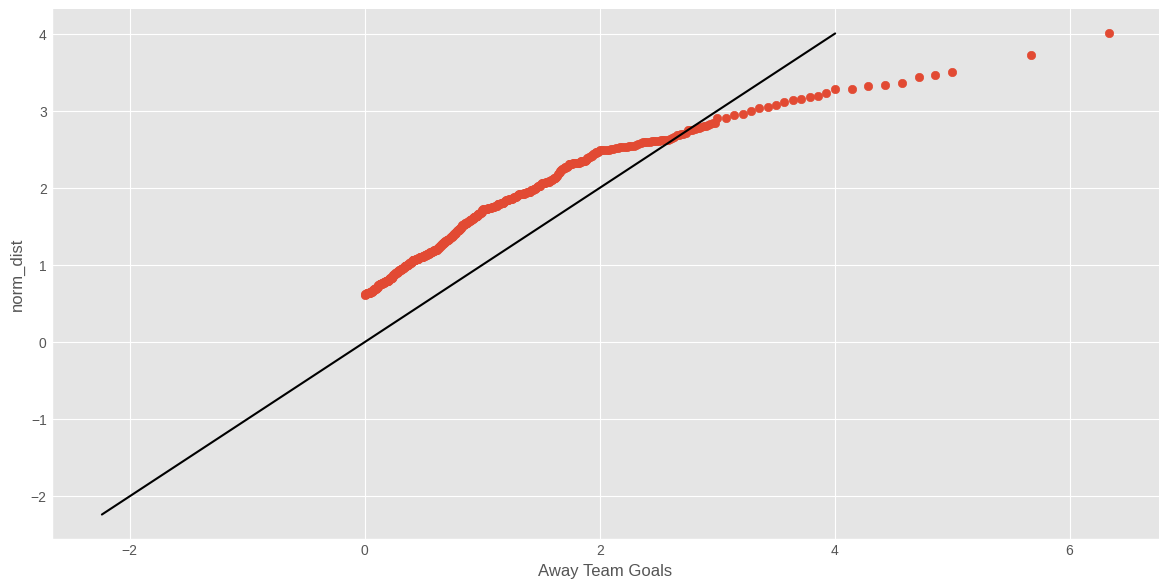

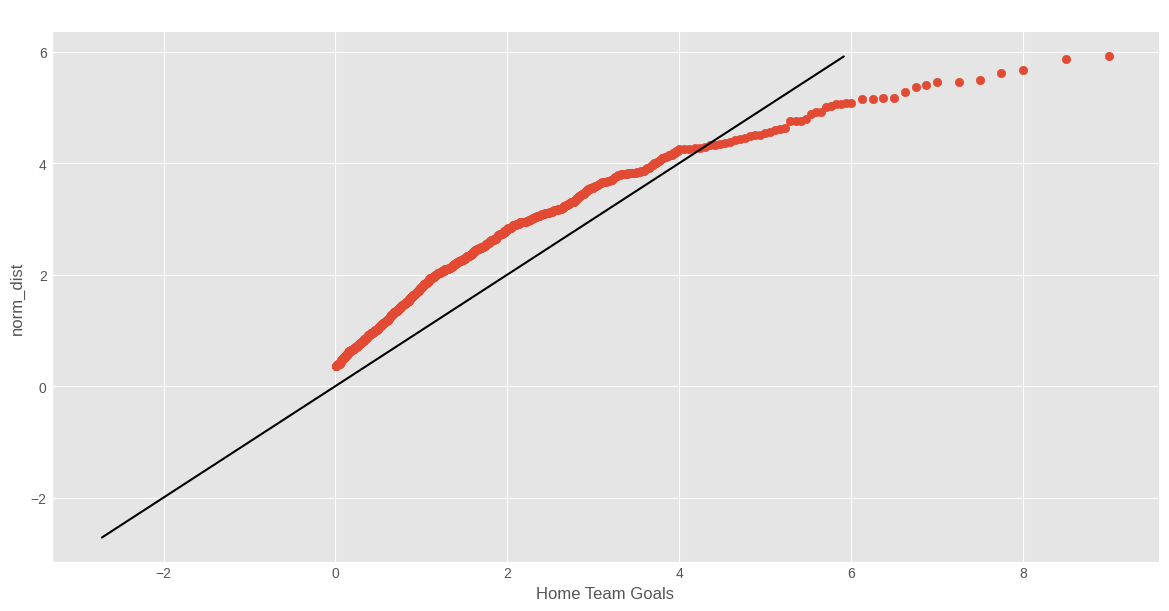

In [73]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
from scipy.stats import norm
plt.style.use('ggplot') #this is to change the color theme.
pplot(Worldcup, x="Home Team Goals", y="Away Team Goals", kind='qq',display_kws={"identity":True},height=6, aspect=2)
pplot(Worldcup,x="Away Team Goals",y=norm,kind='qq',display_kws={"identity":True}, height=6, aspect=2)
pplot(Worldcup,x="Home Team Goals",y=norm,kind='qq',display_kws={"identity":True},height=6, aspect=2)
plt.title("Q-Q Plot: Home Team Goals vs. Away Team Goals")
plt.show()

When plotted against each other I would say they are shifted. As they don't follow the line. They don't perfectly match each other so they don't agree in value, which is to be expected. I wasn't perfectly sure on how to do this problem but this is what I came up with with the lecture video as a guide. I also could be wrong but I wanna say that there is a home team advantage.